In [ ]:
#IMPORTS AND LIBRARIES
import pandas as pd
import numpy as np
import csv
import datetime
from pathlib import Path
from google.colab import files 
import os
import io
import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
# the file to be converted
uploaded = files.upload()

Saving Raw 30min.csv to Raw 30min (1).csv


In [ ]:
#create a dataframe of the csv file
df = pd.read_csv(io.BytesIO(uploaded['Raw 30min.csv']),parse_dates=['DATE & TIME'])
#df = pd.read_csv(io.BytesIO(uploaded['Raw 30min.csv']), na_values=' ')
#df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
#quick look at Dataframe (DF)
df


,DATE & TIME,kWh
0,2021-07-01 00:00:00,356
1,2021-07-01 00:30:00,0
2,2021-07-01 01:00:00,340
3,2021-07-01 01:30:00,0
4,2021-07-01 02:00:00,320
...,...,...
17515,2022-06-30 21:30:00,0
17516,2022-06-30 22:00:00,0
17517,2022-06-30 22:30:00,0
17518,2022-06-30 23:00:00,0


In [ ]:
#IF YOU NEED TO DELETE/DROP ANY COLUMNS


df.drop([ 'Series', 'Unnamed: 4', 'Unnamed: 5' ], axis=1)
#del df2['del']
#df2.drop(df2.columns[[0]], axis=0)
#df2 = df2.drop(['del'], axis=1)

In [ ]:
#check object types
df.dtypes

DATE & TIME    datetime64[ns]
kWh                     int64
dtype: object

In [ ]:
#concat time and date IF DIFFERENT COLUMNS
df['Date'] = pd.to_datetime(df.pop('Date')) + pd.to_timedelta(df.pop('Time'))


In [ ]:
#set date as index

df2 = df.set_index('DATE & TIME')


In [ ]:
df2

,kWh
DATE & TIME,
2021-07-01 00:00:00,356
2021-07-01 00:30:00,0
2021-07-01 01:00:00,340
2021-07-01 01:30:00,0
2021-07-01 02:00:00,320
...,...
2022-06-30 21:30:00,0
2022-06-30 22:00:00,0
2022-06-30 22:30:00,0


In [ ]:
#check NaN values
df2['kWh'].isnull().sum()


0

In [ ]:
#resample and interpolate


df3 = df2.resample('H').bfill(limit=1).interpolate()


#df3 =df2.resample("1H").sum() 

#if you have 30min load data and you want to only use 1H without interpolating
#df3 = df2.loc[df2.index.minute == 0]

In [ ]:
#checking if duplicates in columns
#df2.columns.duplicated().any()
df2= df2.loc[~df2.index.duplicated(), :]

In [ ]:
#check NaN count
df3['Load (kW)'].isnull().sum()

0

In [ ]:
df3

,kWh
DATE & TIME,
2021-07-01 00:00:00,356
2021-07-01 01:00:00,340
2021-07-01 02:00:00,320
2021-07-01 03:00:00,357
2021-07-01 04:00:00,338
...,...
2022-06-30 19:00:00,229
2022-06-30 20:00:00,309
2022-06-30 21:00:00,302


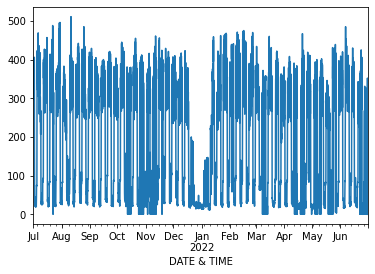

In [ ]:
#view data
df3['kWh'].plot()

In [ ]:
df3.dtypes

kWh    int64
dtype: object

In [ ]:
#save DF to csv file
df3.to_csv(r'PVB Clean 1h.csv', sep=',', encoding='utf-8')